In [ ]:
# Core
import numpy as np
import pandas as pd

# Visualization (for EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from joblib import dump

# Paths & constants
DATA_PATH = "../data/processed/ckd_merged_corrected.csv"  # adjust if notebook is elsewhere
RANDOM_STATE = 42
TEST_SIZE = 0.2

np.random.seed(RANDOM_STATE)


In [2]:
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()


Shape: (600, 28)


,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0.0,0.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,227.9440,1.0,1,6.0
1,0.0,0.0,1.010,0.0,0.0,0.0,0.0,0.0,0.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,227.9440,1.0,1,6.0
2,0.0,0.0,1.010,4.0,1.0,0.0,1.0,0.0,1.0,56.0,...,0.0,0.0,0.0,1.0,0.0,0.0,139.8635,1.0,1,6.0
3,1.0,1.0,1.010,3.0,0.0,0.0,0.0,0.0,0.0,133.0,...,0.0,0.0,0.0,0.0,0.0,0.0,139.8635,1.0,1,6.0
4,0.0,0.0,1.016,0.0,0.0,0.0,0.0,0.0,0.0,175.0,...,0.0,1.0,0.0,1.0,1.0,0.0,139.8635,1.0,1,16.0


In [3]:
print("Columns:\n", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)

print("\nMissing values per column:\n", df.isna().sum())

# Target distribution
print("\nTarget distribution (affected):")
print(df["affected"].value_counts(dropna=False))

# Basic stats
df.describe().T


Columns:
 ['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'affected', 'age']

Dtypes:
 bp (Diastolic)    float64
bp limit          float64
sg                float64
al                float64
rbc               float64
su                float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sod               float64
sc                float64
pot               float64
hemo              float64
pcv               float64
rbcc              float64
wbcc              float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
grf               float64
stage             float64
affected            int64
age               float64
dtype: object

Missing values per co

,count,mean,std,min,25%,50%,75%,max
bp (Diastolic),200.0,0.540000,0.499648,0.00000,0.00000,1.00000,1.0000,1.000
bp limit,588.0,50.715986,37.583333,0.00000,1.00000,70.00000,80.0000,180.000
sg,553.0,1.014692,0.038166,0.50350,1.01000,1.02000,1.0200,1.025
al,554.0,1.003610,1.343387,0.00000,0.00000,0.00000,2.0000,5.000
rbc,448.0,0.160714,0.367678,0.00000,0.00000,0.00000,0.0000,1.000
su,551.0,0.437387,1.085516,0.00000,0.00000,0.00000,0.0000,5.000
pc,535.0,0.226168,0.418741,0.00000,0.00000,0.00000,0.0000,1.000
pcc,596.0,0.115772,0.320220,0.00000,0.00000,0.00000,0.0000,1.000
ba,596.0,0.055369,0.228891,0.00000,0.00000,0.00000,0.0000,1.000
bgr,556.0,144.377698,82.911009,22.00000,95.00000,129.00000,163.5000,490.000


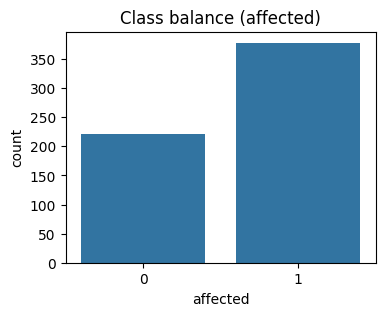

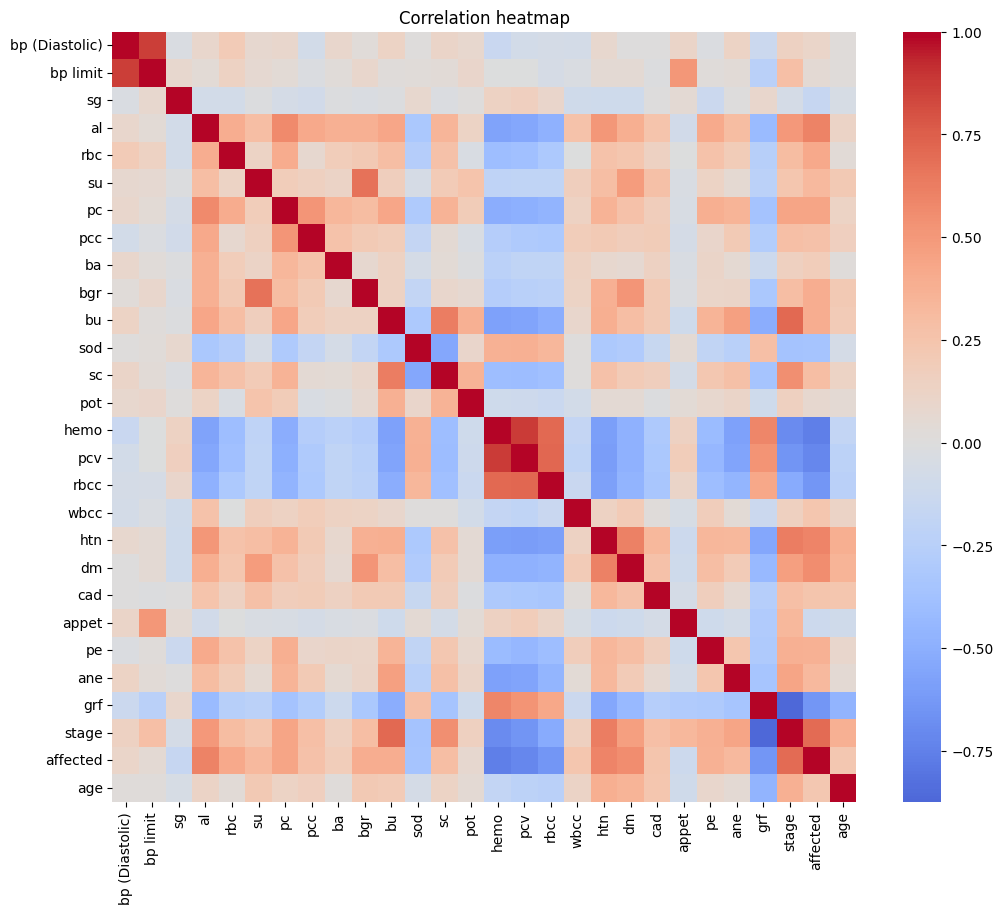

In [4]:
# Class balance bar plot
plt.figure(figsize=(4,3))
sns.countplot(x="affected", data=df)
plt.title("Class balance (affected)")
plt.show()

# Correlation heatmap (quick peek)
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation heatmap")
plt.show()


In [5]:
target_col = "affected"

X = df.drop(columns=[target_col]).copy()
y = df[target_col].astype(int)

print("X shape:", X.shape)
print("y value counts:\n", y.value_counts())


X shape: (600, 27)
y value counts:
 affected
1    378
0    222
Name: count, dtype: int64


In [9]:
robust = RobustScaler()
standard = StandardScaler()
minmax = MinMaxScaler()

X_robust = robust.fit_transform(X_imp)
X_std    = standard.fit_transform(X_robust)
X_scaled = minmax.fit_transform(X_std)

X_scaled.shape


(600, 27)

In [10]:
rf_fs = RandomForestClassifier(
    n_estimators=500,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    class_weight="balanced_subsample"
)
rf_fs.fit(X_scaled, y)

selector = SelectFromModel(rf_fs, threshold="median", prefit=True)
support_mask = selector.get_support()

kept_cols = np.array(X.columns)[support_mask].tolist()
X_sel = X_scaled[:, support_mask]

print(f"Selected {len(kept_cols)} features out of {X.shape[1]}:")
print(kept_cols)


Selected 14 features out of 27:
['sg', 'al', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'hemo', 'pcv', 'rbcc', 'htn', 'dm', 'grf', 'stage']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (480, 14)
Test shape : (120, 14)


In [13]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "metric": ["euclidean", "manhattan"],
    "weights": ["uniform", "distance"],
    "leaf_size": [20, 30],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}

knn = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)
best_knn = grid.best_estimator_


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best params: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best CV accuracy: 0.9833333333333334


In [14]:
y_pred = best_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%\n")

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Test Accuracy: 98.33%

Confusion Matrix:
[[44  0]
 [ 2 74]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9565    1.0000    0.9778        44
           1     1.0000    0.9737    0.9867        76

    accuracy                         0.9833       120
   macro avg     0.9783    0.9868    0.9822       120
weighted avg     0.9841    0.9833    0.9834       120



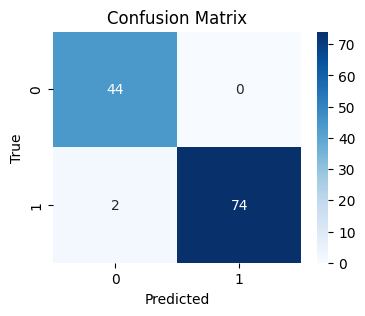

In [15]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [16]:
# Refit imputer & scalers & feature selector on full X,y
imputer_final = IterativeImputer(random_state=RANDOM_STATE)
X_imp_full = imputer_final.fit_transform(X)

robust_final = RobustScaler()
standard_final = StandardScaler()
minmax_final = MinMaxScaler()

X_robust_full = robust_final.fit_transform(X_imp_full)
X_std_full    = standard_final.fit_transform(X_robust_full)
X_scaled_full = minmax_final.fit_transform(X_std_full)

rf_fs_final = RandomForestClassifier(
    n_estimators=500,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    class_weight="balanced_subsample"
)
rf_fs_final.fit(X_scaled_full, y)

selector_final = SelectFromModel(rf_fs_final, threshold="median", prefit=True)
support_mask_final = selector_final.get_support()
kept_cols_final = np.array(X.columns)[support_mask_final].tolist()
X_sel_full = X_scaled_full[:, support_mask_final]

print(f"Final selected {len(kept_cols_final)} features:")
print(kept_cols_final)

# Rebuild best_knn with best params & fit on full data
best_params = grid.best_params_
final_knn = KNeighborsClassifier(**best_params)
final_knn.fit(X_sel_full, y)


Final selected 14 features:
['sg', 'al', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'hemo', 'pcv', 'rbcc', 'htn', 'dm', 'grf', 'stage']


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,20
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


In [ ]:
PIPELINE_PATH = "../models/ckd_knn_pipeline.joblib" 
dump({
    "imputer": imputer_final,
    "robust": robust_final,
    "standard": standard_final,
    "minmax": minmax_final,
    "feature_selector_mask": support_mask_final,
    "kept_columns": kept_cols_final,
    "model": final_knn,
}, PIPELINE_PATH)

print("Saved pipeline to:", PIPELINE_PATH)


Saved pipeline to: ../models/ckd_knn_pipeline.joblib
